In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import + Clean Data

In [47]:
dataset_link = "https://www.kaggle.com/datasets/yasserh/housing-prices-dataset"
df = pd.read_csv("../data/Housing.csv")
df = df.drop(columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'])

In [48]:
df.isnull().sum()

price        0
area         0
bedrooms     0
bathrooms    0
stories      0
parking      0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
 4   stories    545 non-null    int64
 5   parking    545 non-null    int64
dtypes: int64(6)
memory usage: 25.7 KB


In [50]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [51]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [52]:
x_values = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
x_values = x_values.to_numpy()
y_values = df['price']
y_values = y_values.to_numpy()

In [54]:
training_percentage = 0.80
num_train = len(x_values) * 0.8
X_train = x_values[:436]
y_train = y_values[:436]
print(f"X training values (10): \n{X_train[:10]} \n\nY training values (10): \n{y_train[:10]}")

X training values (10): 
[[ 7420     4     2     3     2]
 [ 8960     4     4     4     3]
 [ 9960     3     2     2     2]
 [ 7500     4     2     2     3]
 [ 7420     4     1     2     2]
 [ 7500     3     3     1     2]
 [ 8580     4     3     4     2]
 [16200     5     3     2     0]
 [ 8100     4     1     2     2]
 [ 5750     3     2     4     1]] 

Y training values (10): 
[13300000 12250000 12250000 12215000 11410000 10850000 10150000 10150000
  9870000  9800000]


#### EDA

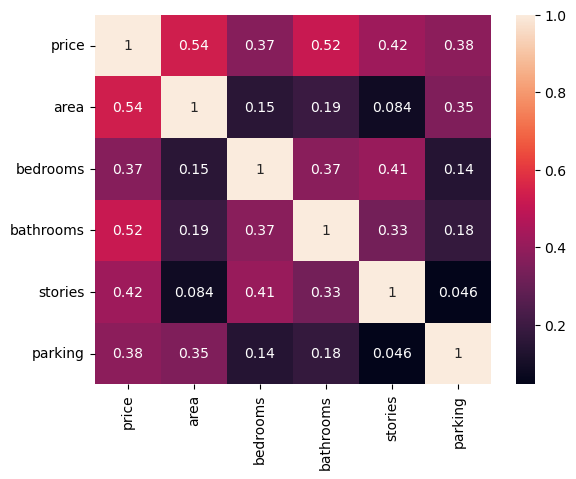

In [80]:
sns.heatmap(df.corr(), annot=True,)
plt.show()

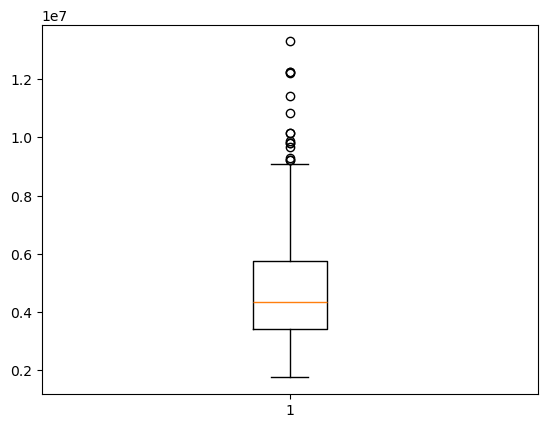

In [97]:
ax = plt.boxplot(df['price'])
plt.show()

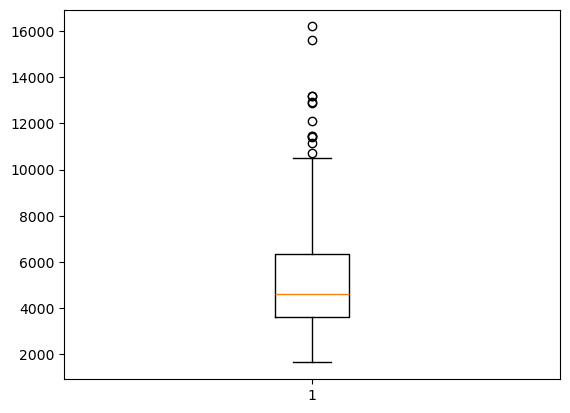

In [98]:
ax2 = plt.boxplot(df['area'])
plt.show()

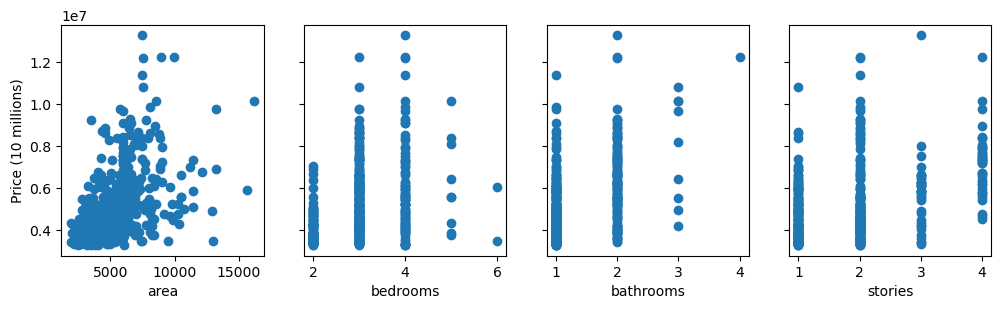

In [61]:
X_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

fig, ax = plt.subplots(1, 4, figsize=(12,3), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train)
    ax[i].set_xlabel(X_features[i])

ax[0].set_ylabel("Price (10 millions)")
plt.show()